In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xlsx = pd.ExcelFile("./GuttmacherInstituteAbortionDataByState.xlsx")
df = xlsx.parse("Guttmacher")

In [3]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

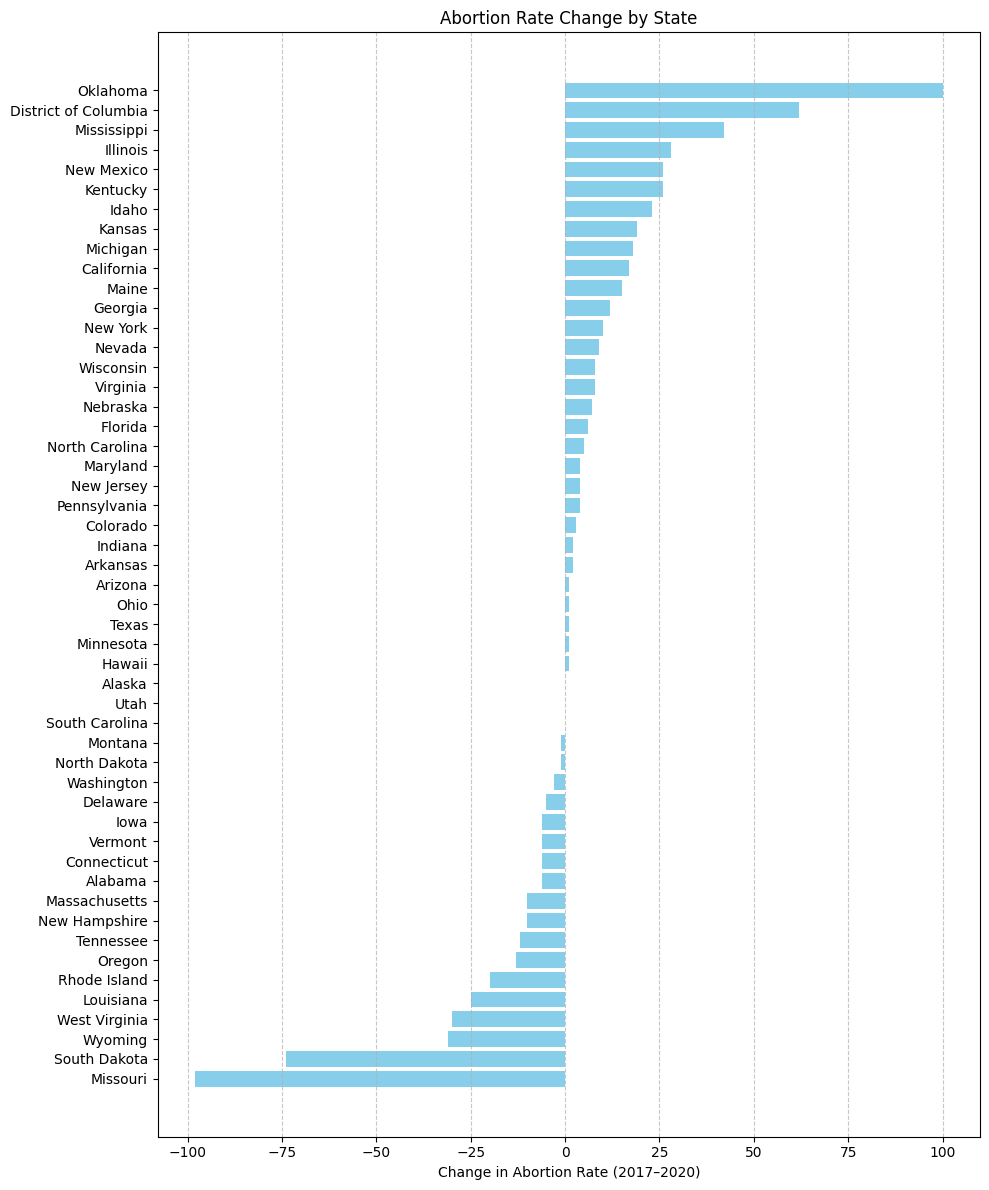

In [5]:
# Sort data by change in abortion rate
sorted_df = df.sort_values(by='% change in abortion rate, 2017-2020')

plt.figure(figsize=(10, 12))
plt.barh(sorted_df['U.S. State'], sorted_df['% change in abortion rate, 2017-2020'], color='skyblue')
plt.xlabel('Change in Abortion Rate (2017–2020)')
plt.title('Abortion Rate Change by State')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

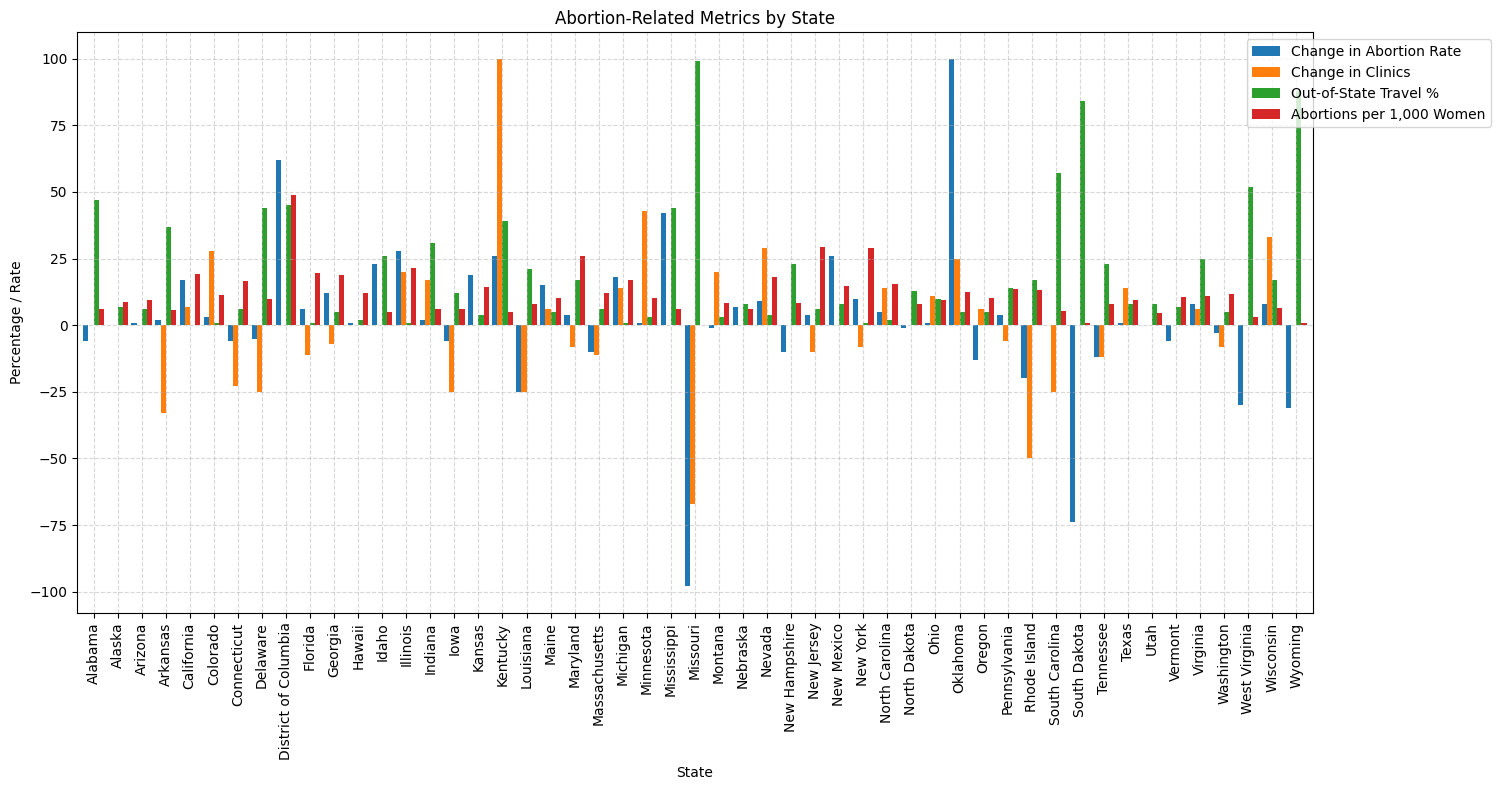

In [7]:
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w]', '', regex=True)

# Convert relevant columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select the columns for visualization
selected_columns = [
    'US_State',
    '_change_in_abortion_rate_20172020',
    '_change_in_the_no_of_abortion_clinics_20172020',
    '_of_residents_obtaining_abortions_who_traveled_out_of_state_for_care_2020',
    'No_of_abortions_per_1000_women_aged_1544_by_state_of_occurrence_2020'
]

# Create a subset DataFrame
subset_df = df[selected_columns].set_index('US_State')
subset_df.columns = [
    'Change in Abortion Rate',
    'Change in Clinics',
    'Out-of-State Travel %',
    'Abortions per 1,000 Women'
]

# Plot the grouped bar chart
subset_df.plot(kind='bar', figsize=(15, 8), width=0.85)
plt.title('Abortion-Related Metrics by State')
plt.ylabel('Percentage / Rate')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
red = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming']
blue = ['California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_30733/1093184946.py:66: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_30733/1093184946.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


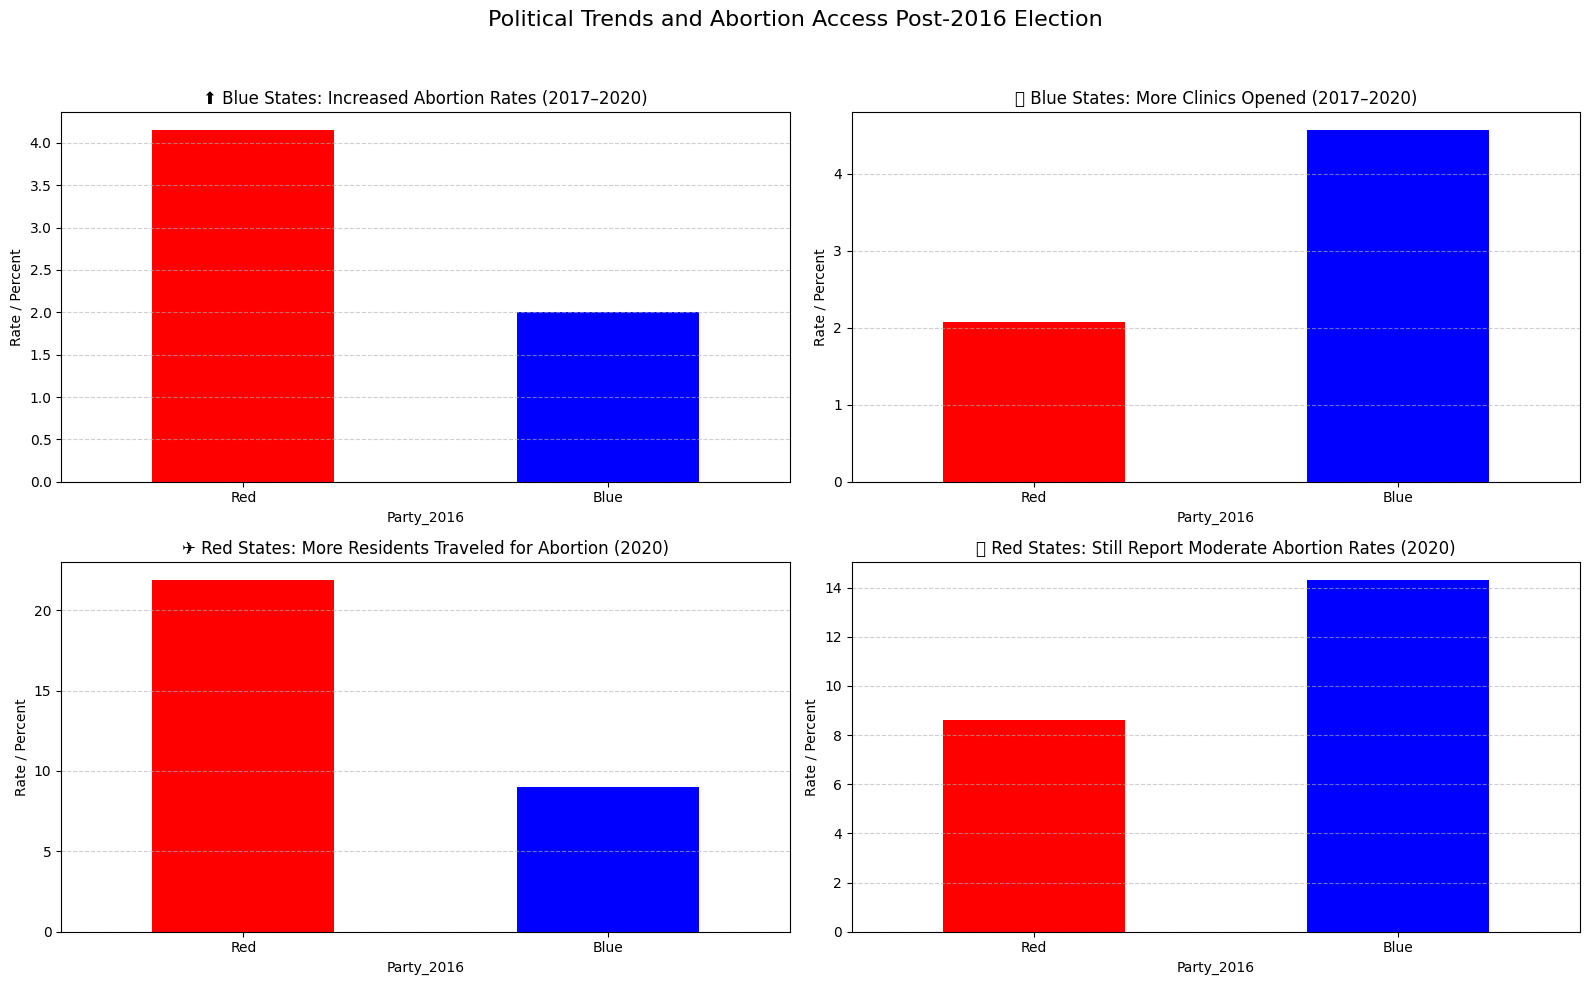

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and prepare (if not done yet)
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w]', '', regex=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define red and blue states (update names if needed for matching)
red_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
              'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania',
              'South_Carolina', 'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'West_Virginia', 'Wisconsin', 'Wyoming']
blue_states = ['California', 'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia', 'Hawaii', 'Illinois',
               'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New_Hampshire', 'New_Jersey',
               'New_Mexico', 'New_York', 'Oregon', 'Rhode_Island', 'Vermont', 'Virginia', 'Washington']

# Assign political leaning
df['Party_2016'] = df['US_State'].apply(lambda state: 'Red' if state in red_states else (
    'Blue' if state in blue_states else 'Unknown'))

# Metrics and grouped means
metrics = {
    'Abortion Rate (2020)': 'No_of_abortions_per_1000_women_aged_1544_by_state_of_occurrence_2020',
    '% Out-of-State Travel (2020)': '_of_residents_obtaining_abortions_who_traveled_out_of_state_for_care_2020',
    '% Change in Clinics (2017–2020)': '_change_in_the_no_of_abortion_clinics_20172020',
    '% Change in Abortion Rate (2017–2020)': '_change_in_abortion_rate_20172020'
}
grouped_stats = df.groupby('Party_2016')[[v for v in metrics.values()]].mean()

# Refined argument structure for plots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Political Trends and Abortion Access Post-2016 Election", fontsize=16)

plot_config = [
    {
        "title": "⬆️ Blue States: Increased Abortion Rates (2017–2020)",
        "column": '_change_in_abortion_rate_20172020',
        "ax": axs[0, 0]
    },
    {
        "title": "🏥 Blue States: More Clinics Opened (2017–2020)",
        "column": '_change_in_the_no_of_abortion_clinics_20172020',
        "ax": axs[0, 1]
    },
    {
        "title": "✈️ Red States: More Residents Traveled for Abortion (2020)",
        "column": '_of_residents_obtaining_abortions_who_traveled_out_of_state_for_care_2020',
        "ax": axs[1, 0]
    },
    {
        "title": "📊 Red States: Still Report Moderate Abortion Rates (2020)",
        "column": 'No_of_abortions_per_1000_women_aged_1544_by_state_of_occurrence_2020',
        "ax": axs[1, 1]
    },
]

# Generate each subplot
for config in plot_config:
    grouped_stats[config["column"]][['Red', 'Blue']].plot(kind='bar', ax=config["ax"], color=['red', 'blue'])
    config["ax"].set_title(config["title"], fontsize=12)
    config["ax"].set_ylabel('Rate / Percent')
    config["ax"].set_xticklabels(['Red', 'Blue'], rotation=0)
    config["ax"].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


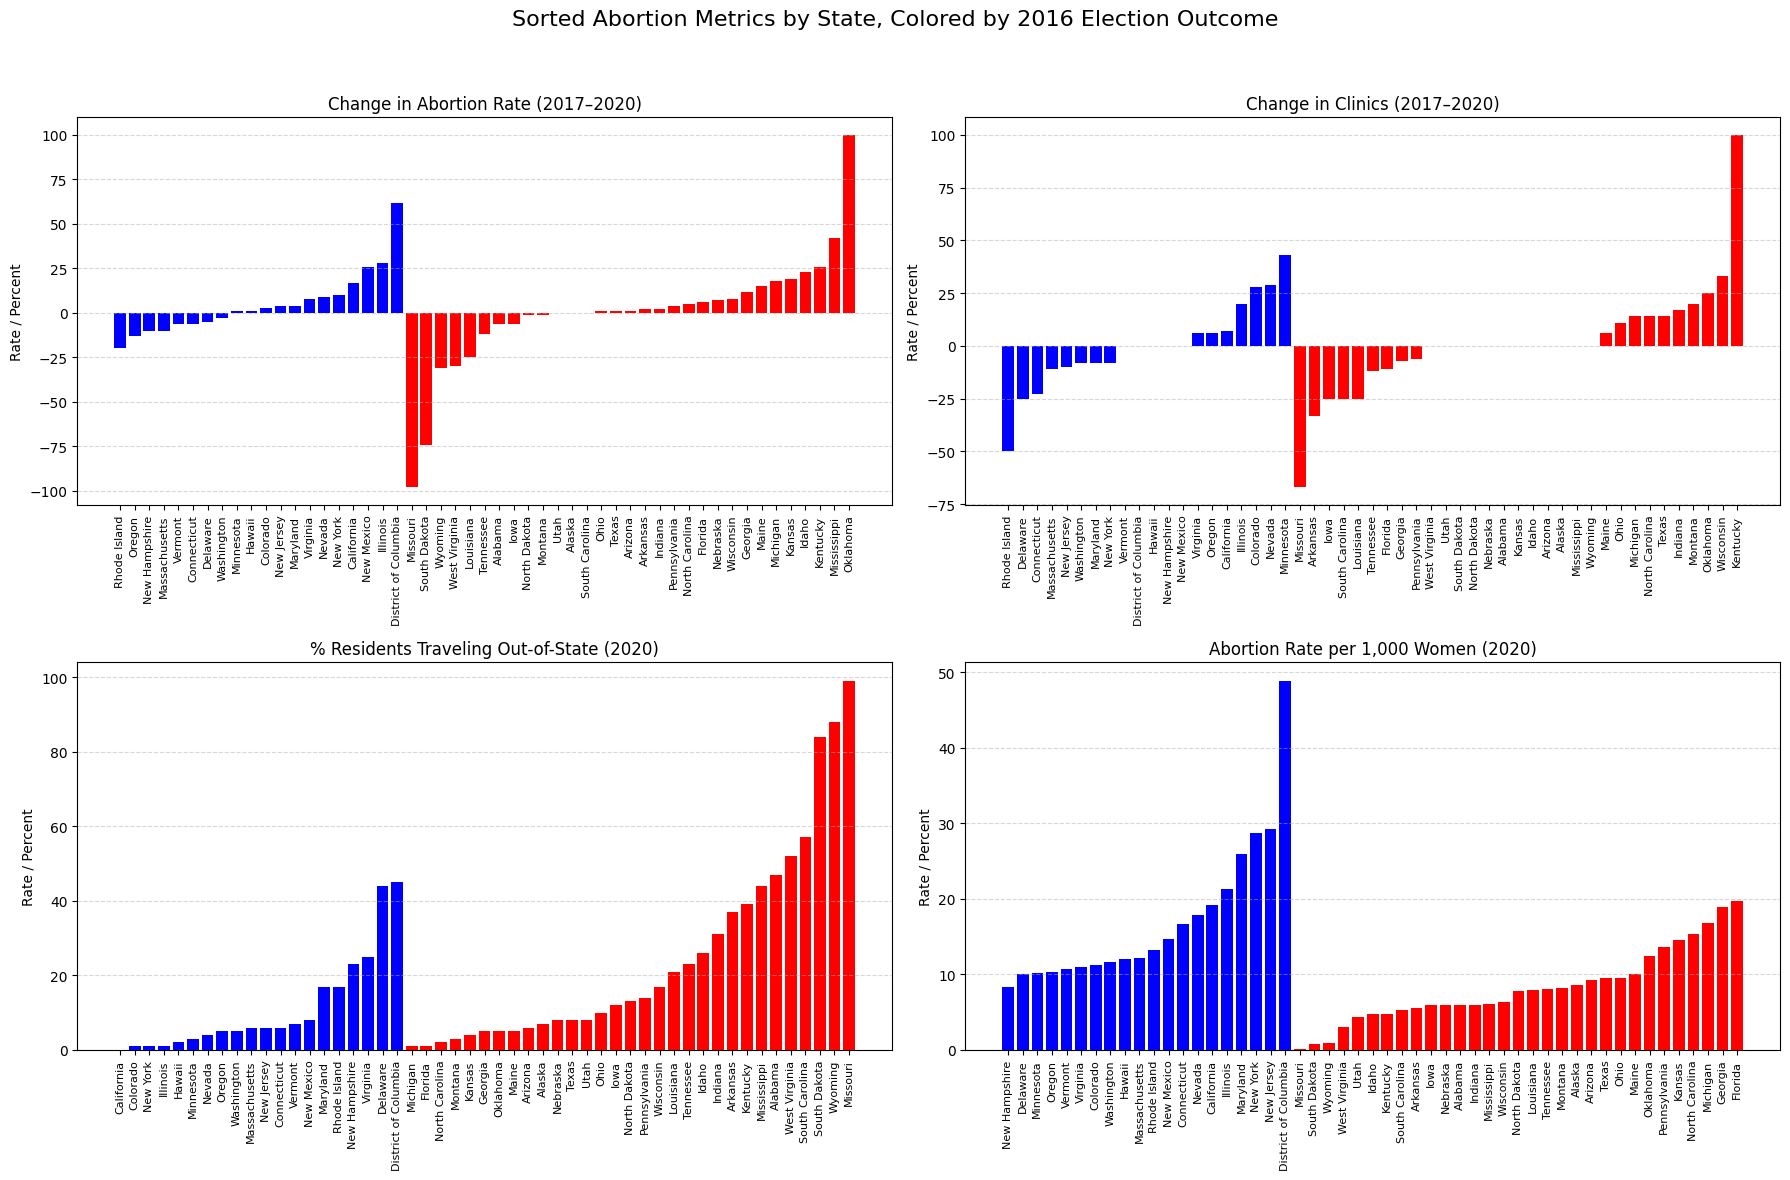

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and prepare the DataFrame
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w]', '', regex=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define red and blue states
red_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
              'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania',
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming']
blue_states = ['California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois',
               'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Hampshire', 'New Jersey',
               'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']

# Apply state labels and fix formatting
df['US_State'] = df['US_State'].str.replace('_', ' ')
df['Party_2016'] = df['US_State'].apply(
    lambda state: 'Red' if state in red_states else ('Blue' if state in blue_states else 'Unknown')
)

# Define the metrics to plot
plot_metrics = [
    ('Change in Abortion Rate (2017–2020)', '_change_in_abortion_rate_20172020'),
    ('Change in Clinics (2017–2020)', '_change_in_the_no_of_abortion_clinics_20172020'),
    ('% Residents Traveling Out-of-State (2020)', '_of_residents_obtaining_abortions_who_traveled_out_of_state_for_care_2020'),
    ('Abortion Rate per 1,000 Women (2020)', 'No_of_abortions_per_1000_women_aged_1544_by_state_of_occurrence_2020')
]

# Generate the plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Sorted Abortion Metrics by State, Colored by 2016 Election Outcome', fontsize=16)

for ax, (title, col) in zip(axs.flat, plot_metrics):
    red_df = df[df['Party_2016'] == 'Red'].sort_values(by=col, ascending=True)
    blue_df = df[df['Party_2016'] == 'Blue'].sort_values(by=col, ascending=True)
    combined_df = pd.concat([blue_df, red_df])

    colors = combined_df['Party_2016'].map({'Blue': 'blue', 'Red': 'red', 'Unknown': 'gray'})

    ax.bar(combined_df['US_State'], combined_df[col], color=colors)
    ax.set_title(title)
    ax.set_ylabel('Rate / Percent')
    ax.set_xticks(range(len(combined_df)))
    ax.set_xticklabels(combined_df['US_State'], rotation=90, fontsize=8)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()